# Choose Loss Functions When Training Deep Learning Neural Networks

The error for the current state of the model must be estimated repeatedly. This requires the choice of an error function, conventionally called a loss function, that can be used to estimate the loss of the model so that the weights can be updated to reduce the loss on the next evaluation.

Neural network models learn a mapping from inputs to outputs from examples and the choice of loss function must match the framing of the specific predictive modeling problem, such as classification or regression. Further, the configuration of the output layer must also be appropriate for the chosen loss function.

When training machine learning models, the choice of loss function is crucial and depends on the nature of the problem you are solving. Different loss functions are designed for different types of problems, and selecting the appropriate one can significantly impact the performance of your model. Here's a brief comparison of some common loss functions:

### Mean Squared Error (MSE):

Use Case: Regression problems where the goal is to predict a continuous variable.
Properties: Sensitive to outliers; penalizes larger errors more heavily.

### Mean Absolute Error (MAE):

Use Case: Similar to MSE, suitable for regression problems.
Properties: Less sensitive to outliers compared to MSE; provides a linear penalty for errors.

### Huber Loss:

Use Case: A compromise between MSE and MAE, balancing the robustness of MAE with the efficiency of MSE.
Properties: Less sensitive to outliers than MSE, but still provides some degree of error magnification.

### Logarithmic Loss (Log Loss or Cross-Entropy Loss):

Use Case: Binary and multiclass classification problems.
Properties: Encourages the model to predict probabilities that align with true class probabilities; penalizes confidently wrong predictions.

### Hinge Loss:

Use Case: Binary and multiclass classification problems, commonly used with Support Vector Machines (SVMs).
Properties: Designed for classifiers; penalizes confident misclassifications.

### Mean Squared Logarithmic Error (MSLE):

Use Case: Regression problems where the target variable spans several orders of magnitude.
Properties: Similar to MSE but less sensitive to large differences in the target variable.

### Categorical Cross-Entropy Loss:

Use Case: Multiclass classification problems.
Properties: Similar to binary cross-entropy but extended to handle multiple classes.

### Binary Cross-Entropy Loss:

Use Case: Binary classification problems.
Properties: Encourages the model to output probabilities close to 0 or 1 for correct classification.

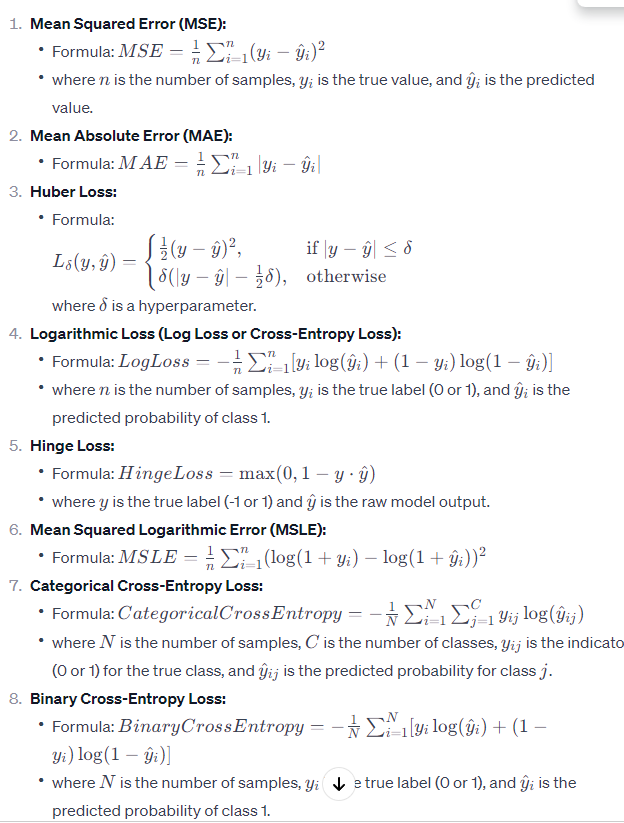

In [72]:
from IPython.display import Image
Image(filename=r"E:\DS_ACADEMIC\Interview Question\DL\DL_Video_Ques\Cost_Function\CF.png", width=800, height=400)

### A) Regression Loss Functions
* Mean Squared Error Loss
* Mean Squared Logarithmic Error Loss
* Mean Absolute Error Loss
### B) Binary Classification Loss Functions
* Binary Cross-Entropy
* Hinge Loss
* Squared Hinge Loss
### C) Multi-Class Classification Loss Functions
* Multi-Class Cross-Entropy Loss
* Sparse Multiclass Cross-Entropy Loss
* Kullback Leibler Divergence Loss

# A) Regression Loss Functions
A regression predictive modeling problem involves predicting a real-valued quantity.

## A1)Mean Squared Error Loss

In [43]:
from sklearn.datasets import make_regression
# Genertae regression dataset
x,y=make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
x

array([[ 0.22584183,  1.55137772, -0.10734682, ..., -1.35154745,
         0.3646018 ,  0.13316649],
       [ 0.11083638, -1.45461475,  0.26388849, ..., -1.42646391,
        -0.60451386, -0.16624207],
       [ 0.45860045, -0.08127955, -0.69847376, ...,  0.90822252,
         0.51141526, -2.09317802],
       ...,
       [-0.5125888 ,  1.12477672,  0.89835957, ...,  0.6832124 ,
         1.09848488,  1.27442843],
       [-2.96836843, -0.92984795,  0.05520801, ...,  1.34954631,
        -0.489467  ,  1.23228383],
       [-0.48716718,  2.80137299, -1.08863484, ..., -2.21760908,
         0.50011283,  0.83533344]])

In [44]:
y

array([ 2.88732802e+00, -2.54379865e+02,  1.88854342e+02, -1.79585447e+02,
       -4.80788734e+01,  2.39149474e+02, -1.50848201e+02,  5.04209549e+01,
       -5.01494274e+00, -1.54877686e+02,  5.49256175e+00,  1.55739624e+01,
       -3.11666770e+02, -2.15504875e+02,  1.89932206e+02,  1.33656985e+02,
        6.35964986e+01,  9.71931458e+01,  3.67564459e+01, -1.14603500e+01,
        3.44074480e+01,  1.11323497e+00, -1.99644240e+02,  1.56371739e+02,
       -1.91471003e+02,  5.08273286e+01,  1.97183359e+02,  1.02658640e+02,
        3.48936318e+02, -1.87651315e+02,  3.46818786e+02, -1.75598881e+02,
        7.38150461e+01, -2.09811925e+02,  1.69119985e+02,  9.66667147e+01,
       -1.88238742e+02, -1.89756566e+02,  2.33684367e+02,  1.73623939e+02,
        3.14671349e+02, -4.86977718e+02,  6.27632764e+01, -2.55091051e+02,
        6.68354893e+01,  1.92047170e+02,  2.08143963e+02, -2.38385548e+02,
       -1.69401627e+02, -1.75668000e+02,  1.93024794e+02,  3.78338450e+02,
        1.25351049e+02,  

In [45]:
# standardize dataset
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]

In [46]:
# split into train and test
n_train = 500
trainX, testX = x[:n_train, :], x[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [47]:
#define model
from keras import Sequential
from keras.layers import Dense, SimpleRNN

model=Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

In [48]:
from keras.optimizers import SGD
opt=SGD(learning_rate=0.01, momentum=0.1)
model.compile(loss='mean_squared_error', optimizer=opt)

In [49]:
# fit model
history=model.fit(trainX,trainy,validation_data=(testX,testy),epochs=100,verbose=0)

In [50]:
# Evaluate the model
train_mse= model.evaluate(trainX,trainy, verbose=0)
test_mse= model.evaluate(testX,testy, verbose=0)
print('Train: %3f, Test: %3f' %(train_mse,test_mse))

Train: 0.027605, Test: 0.054460


* verbose=0: No output during training.
* verbose=1: Display a progress bar and summary information for each epoch.
* verbose=2: Display one line of output for each epoch, including information about loss and metrics.
You can adjust the verbosity level based on your preference and the amount of detail you want to see during the training process. This is just one example, and the concept of verbosity applies similarly in other deep learning frameworks as well.

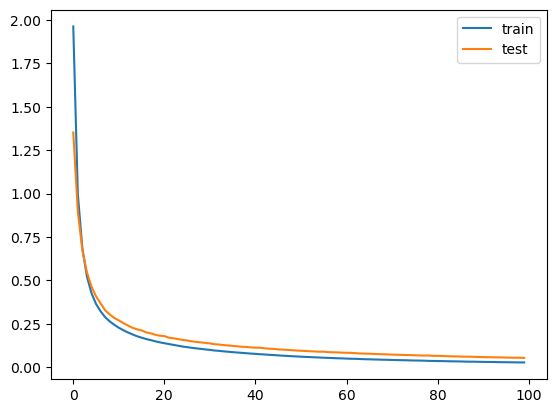

In [51]:
# plot loss during trainning
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## A2) Mean Squared Logarithmic Error Loss

 There may be regression problems in which the target value has a spread of values and when predicting a large value, you may not want to punish a model as heavily as mean squared error.

Instead, you can first calculate the natural logarithm of each of the predicted values, then calculate the mean squared error. This is called the Mean Squared Logarithmic Error loss, or MSLE for short.

It has the effect of relaxing the punishing effect of large differences in large predicted values.

As a loss measure, it may be more appropriate when the model is predicting unscaled quantities directly.

Train: 0.107, Test: 0.134


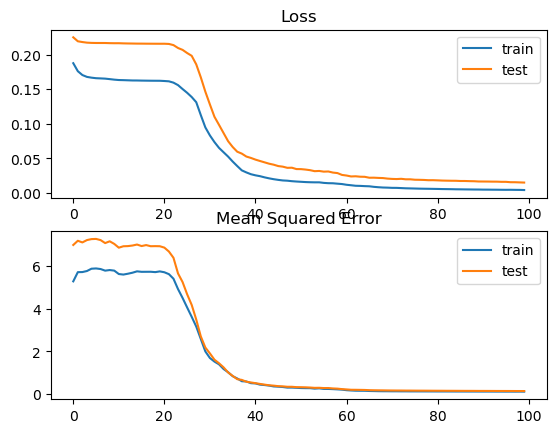

In [61]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
# standardize dataset
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='mean_squared_logarithmic_error', optimizer=opt, metrics=['mse'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_mse = model.evaluate(trainX, trainy, verbose=0)
_, test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot mse during training
plt.subplot(212)
plt.title('Mean Squared Error')
plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.legend()
plt.show()

## A3) Mean Absolute Error Loss

Train: 0.008, Test: 0.013


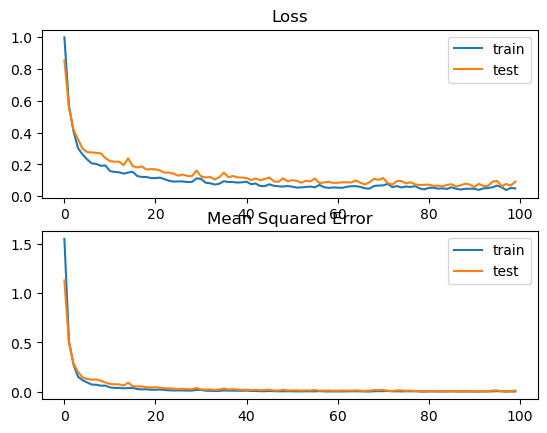

In [60]:
# mlp for regression with mae loss function
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
# standardize dataset
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mse'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_mse = model.evaluate(trainX, trainy, verbose=0)
_, test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot mse during training
plt.subplot(212)
plt.title('Mean Squared Error')
plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.legend()
plt.show()

## B) Binary Classification Loss Functions

Binary classification are those predictive modeling problems where examples are assigned one of two labels.

The problem is often framed as predicting a value of 0 or 1 for the first or second class and is often implemented as predicting the probability of the example belonging to class value 1.

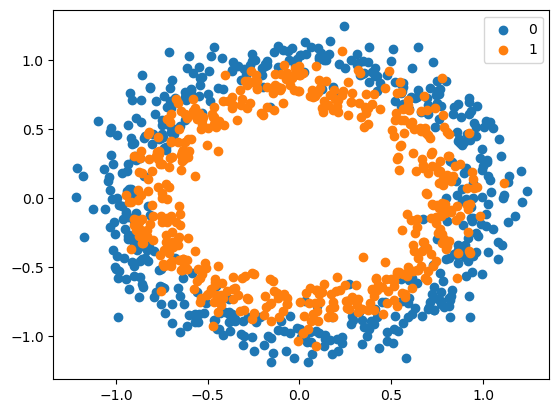

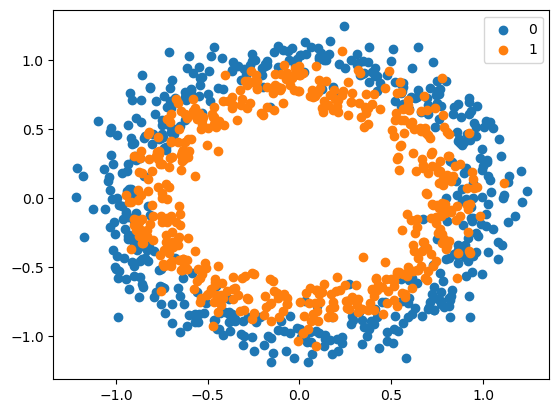

In [71]:
# scatter plot of the circles dataset with points colored by class
from sklearn.datasets import make_circles
from numpy import where
from matplotlib import pyplot
# generate circles
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# select indices of points with each class label
for i in range(2):
 samples_ix = where(y == i)
 pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
pyplot.legend()
pyplot.show()# scatter plot of the circles dataset with points colored by class
from sklearn.datasets import make_circles
from numpy import where
from matplotlib import pyplot
# generate circles
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# select indices of points with each class label
for i in range(2):
 samples_ix = where(y == i)
 pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
pyplot.legend()
pyplot.show()

## B1) Binary Cross-Entropy Loss

Cross-entropy is the default loss function to use for binary classification problems.

It is intended for use with binary classification where the target values are in the set {0, 1}.

Mathematically, it is the preferred loss function under the inference framework of maximum likelihood. It is the loss function to be evaluated first and only changed if you have a good reason.

Cross-entropy will calculate a score that summarizes the average difference between the actual and predicted probability distributions for predicting class 1. The score is minimized and a perfect cross-entropy value is 0.

C:\Users\viren\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Train: 0.832, Test: 0.846


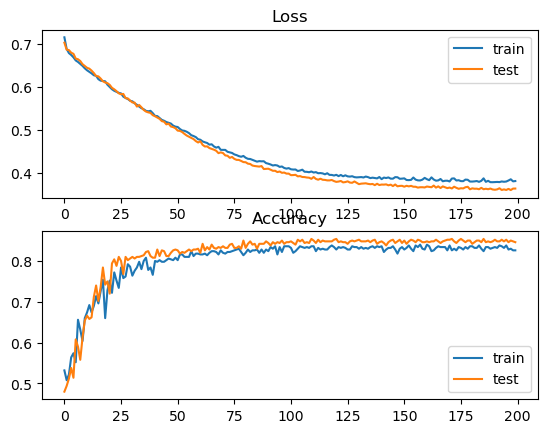

In [62]:
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

## B2) Hinge Loss

An alternative to cross-entropy for binary classification problems is the hinge loss function, primarily developed for use with Support Vector Machine (SVM) models.

It is intended for use with binary classification where the target values are in the set {-1, 1}.

The hinge loss function encourages examples to have the correct sign, assigning more error when there is a difference in the sign between the actual and predicted class values.

Reports of performance with the hinge loss are mixed, sometimes resulting in better performance than cross-entropy on binary classification problems.

Train: 0.420, Test: 0.416


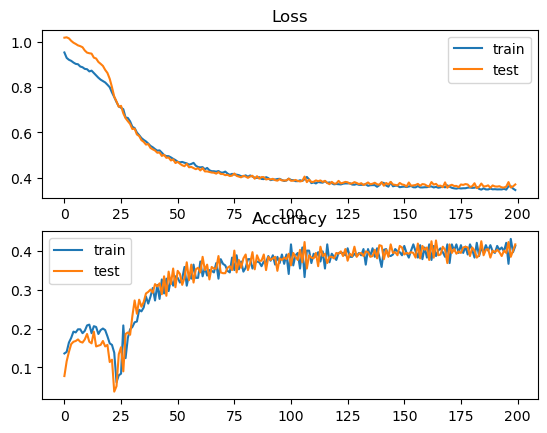

In [63]:

# mlp for the circles problem with hinge loss
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot
from numpy import where
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# change y from {0,1} to {-1,1}
y[where(y == 0)] = -1
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='tanh'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='hinge', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# B3) Squared Hinge Loss

The hinge loss function has many extensions, often the subject of investigation with SVM models.

A popular extension is called the squared hinge loss that simply calculates the square of the score hinge loss. It has the effect of smoothing the surface of the error function and making it numerically easier to work with.

If using a hinge loss does result in better performance on a given binary classification problem, is likely that a squared hinge loss may be appropriate.

As with using the hinge loss function, the target variable must be modified to have values in the set {-1, 1}.

Train: 0.328, Test: 0.334


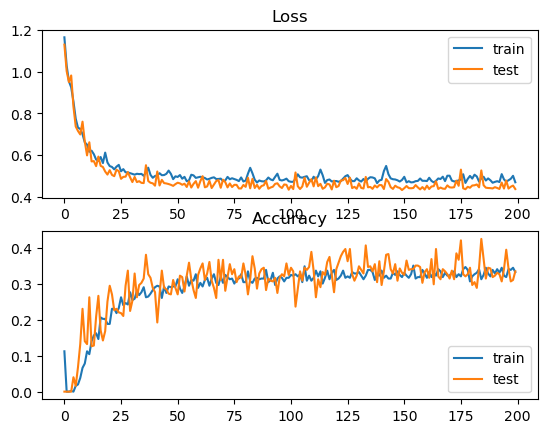

In [64]:
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot
from numpy import where
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# change y from {0,1} to {-1,1}
y[where(y == 0)] = -1
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='tanh'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='squared_hinge', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

## C) Multi-Class Classification Loss Functions

Multi-Class classification are those predictive modeling problems where examples are assigned one of more than two classes.

The problem is often framed as predicting an integer value, where each class is assigned a unique integer value from 0 to (num_classes – 1). The problem is often implemented as predicting the probability of the example belonging to each known class.

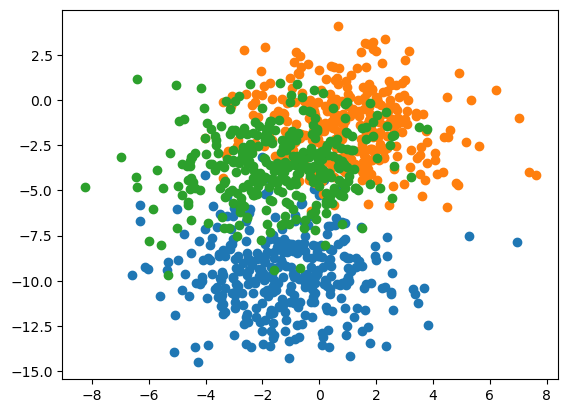

In [70]:
from sklearn.datasets import make_blobs
from numpy import where
from matplotlib import pyplot
# generate dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# select indices of points with each class label
for i in range(3):
 samples_ix = where(y == i)
 pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1])
pyplot.show()

# C1) Multi-Class Cross-Entropy Loss

Cross-entropy is the default loss function to use for multi-class classification problems.

In this case, it is intended for use with multi-class classification where the target values are in the set {0, 1, 3, …, n}, where each class is assigned a unique integer value.

Mathematically, it is the preferred loss function under the inference framework of maximum likelihood. It is the loss function to be evaluated first and only changed if you have a good reason.

Cross-entropy will calculate a score that summarizes the average difference between the actual and predicted probability distributions for all classes in the problem. The score is minimized and a perfect cross-entropy value is 0.

Train: 0.834, Test: 0.818


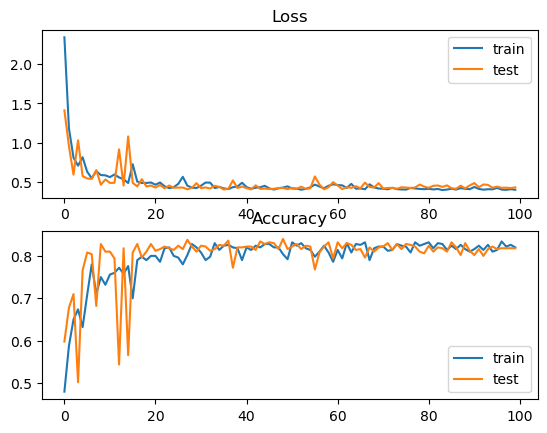

In [66]:

# mlp for the blobs multi-class classification problem with cross-entropy loss
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

## C2) Sparse Multiclass Cross-Entropy Loss

A possible cause of frustration when using cross-entropy with classification problems with a large number of labels is the one hot encoding process.

For example, predicting words in a vocabulary may have tens or hundreds of thousands of categories, one for each label. This can mean that the target element of each training example may require a one hot encoded vector with tens or hundreds of thousands of zero values, requiring significant memory.

Sparse cross-entropy addresses this by performing the same cross-entropy calculation of error, without requiring that the target variable be one hot encoded prior to training.

Train: 0.830, Test: 0.820


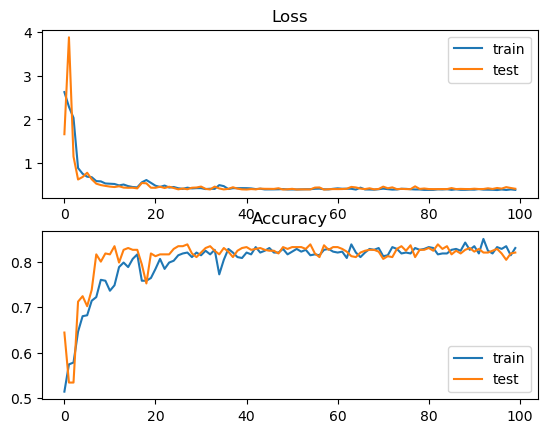

In [67]:

# mlp for the blobs multi-class classification problem with sparse cross-entropy loss
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

## C3)Kullback Leibler Divergence Loss

Kullback Leibler Divergence, or KL Divergence for short, is a measure of how one probability distribution differs from a baseline distribution.

A KL divergence loss of 0 suggests the distributions are identical. In practice, the behavior of KL Divergence is very similar to cross-entropy. It calculates how much information is lost (in terms of bits) if the predicted probability distribution is used to approximate the desired target probability distribution.

As such, the KL divergence loss function is more commonly used when using models that learn to approximate a more complex function than simply multi-class classification, such as in the case of an autoencoder used for learning a dense feature representation under a model that must reconstruct the original input. In this case, KL divergence loss would be preferred. Nevertheless, it can be used for multi-class classification, in which case it is functionally equivalent to multi-class cross-entropy.

KL divergence loss can be used in Keras by specifying ‘kullback_leibler_divergence‘ in the compile()

Train: 0.820, Test: 0.824


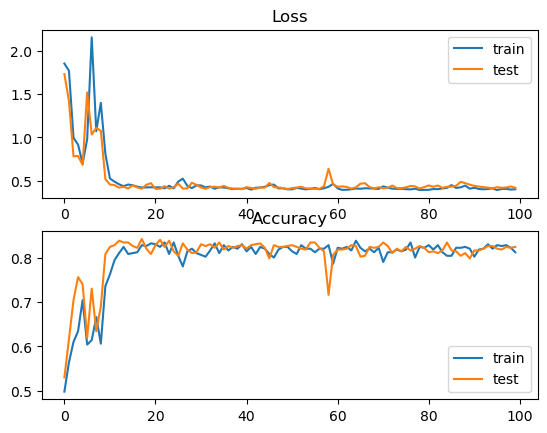

In [69]:
# mlp for the blobs multi-class classification problem with kl divergence loss
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='kullback_leibler_divergence', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()